importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train_loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Data preprocessing

In [9]:
#handling numerical missing data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
#handling categorical missing data
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data Analysis

categorical data

<Axes: xlabel='Gender', ylabel='count'>

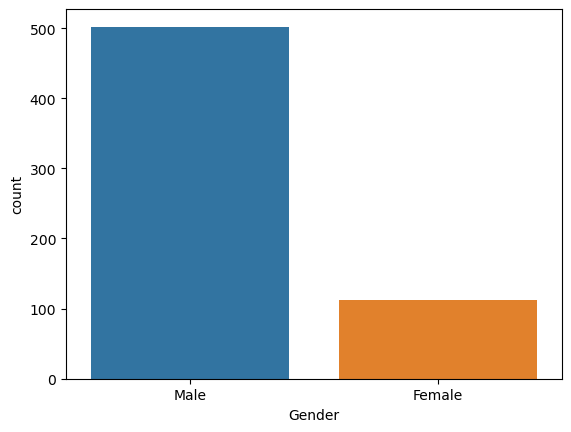

In [12]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Married', ylabel='count'>

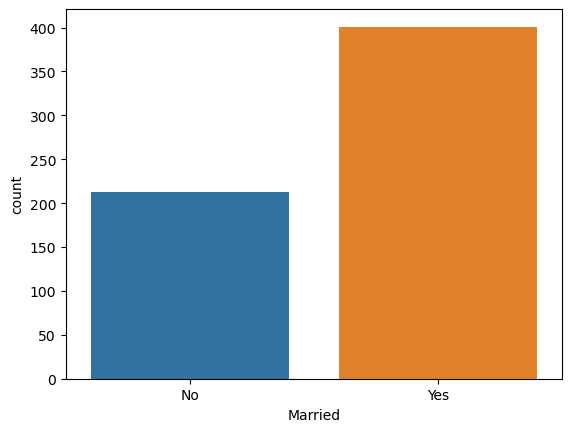

In [13]:
sns.countplot(x='Married',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

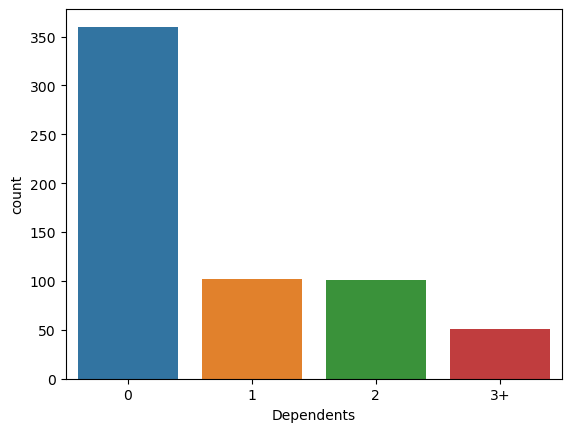

In [14]:
sns.countplot(x='Dependents',data=df)

<Axes: xlabel='Education', ylabel='count'>

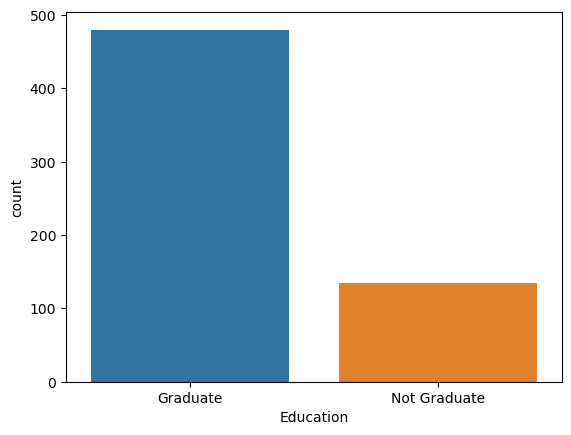

In [15]:
sns.countplot(x='Education',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

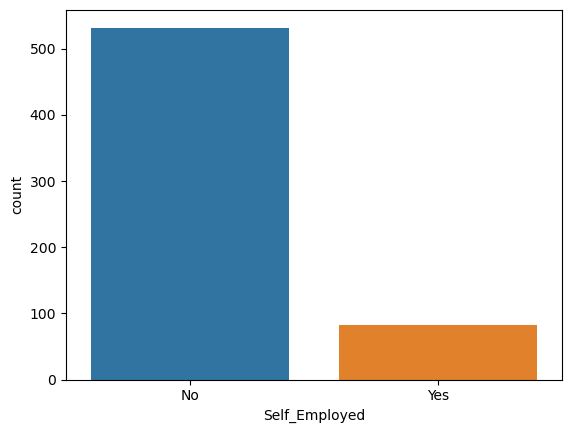

In [16]:
sns.countplot(x='Self_Employed',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

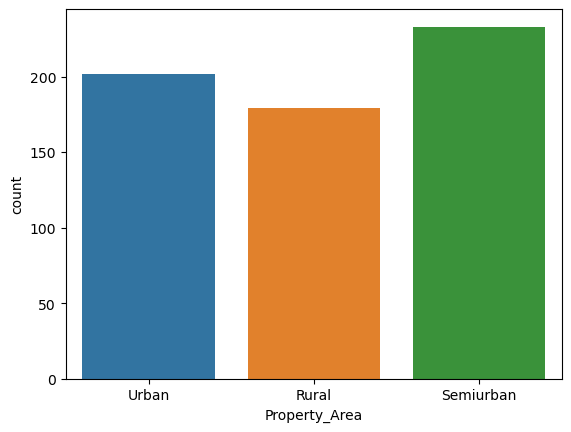

In [17]:
sns.countplot(x='Property_Area',data=df)

Numerical data

<Axes: >

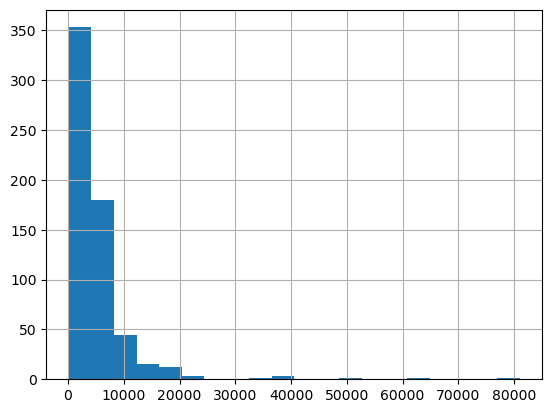

In [18]:
df['ApplicantIncome'].hist(bins=20)

<Axes: >

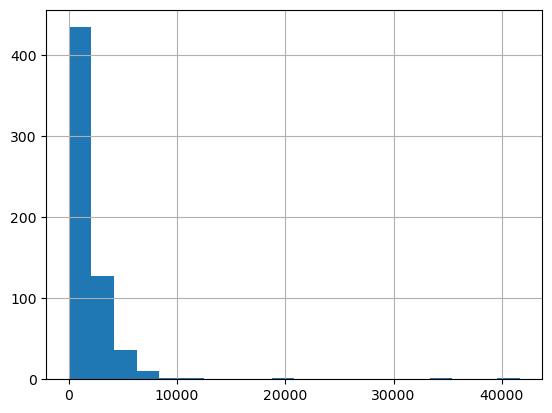

In [19]:
df['CoapplicantIncome'].hist(bins=20)

<Axes: >

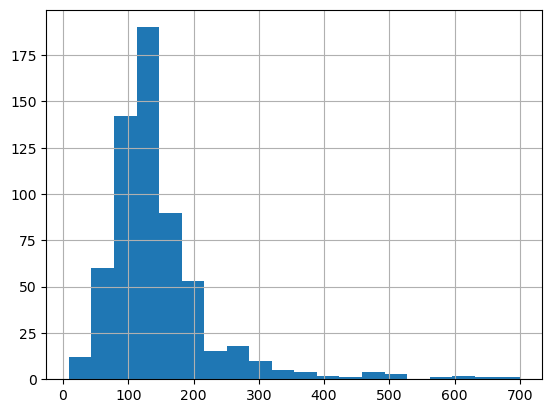

In [20]:
df['LoanAmount'].hist(bins=20)

<Axes: >

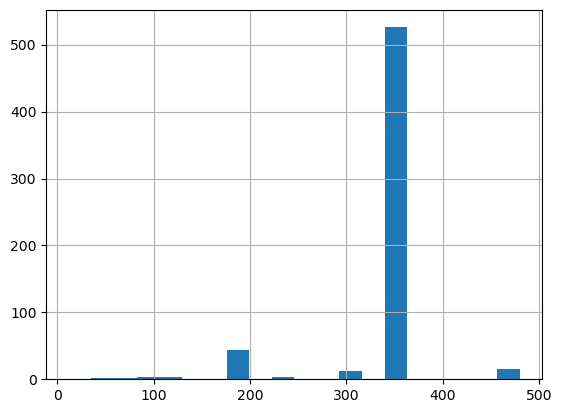

In [21]:
df['Loan_Amount_Term'].hist(bins=20)

<Axes: >

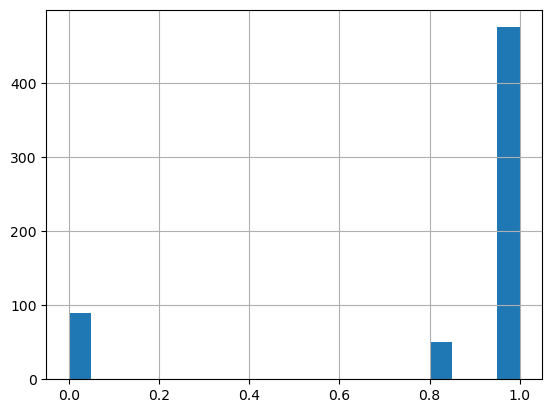

In [22]:
df['Credit_History'].hist(bins=20)

Created New Data

In [23]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Data Transformation

In [25]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

<Axes: >

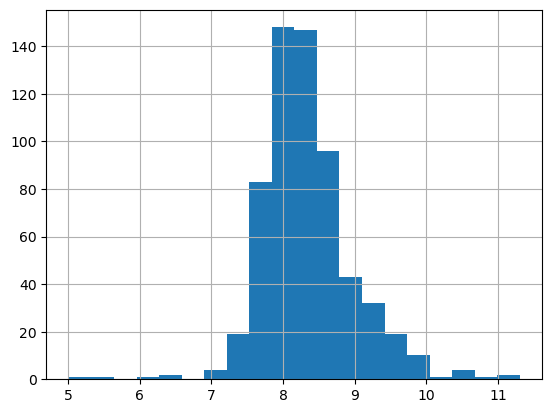

In [26]:
df['ApplicantIncomeLog'].hist(bins=20)

In [27]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])

C:\Users\Romit\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])

<Axes: >

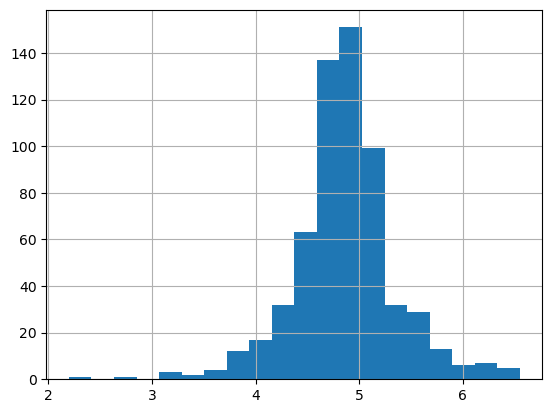

In [29]:
df['LoanAmountLog'].hist(bins=20)

In [30]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])

In [31]:
df['TotalIncomeLog'] = np.log(df['TotalIncome'])

In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [33]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome','Loan_ID','CoapplicantIncomeLog']
df = df.drop(columns=cols,axis=1)

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


Handling Categorical values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    object 
 1   Married              614 non-null    object 
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        614 non-null    object 
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    object 
 7   Loan_Status          614 non-null    object 
 8   ApplicantIncomeLog   614 non-null    float64
 9   LoanAmountLog        614 non-null    float64
 10  Loan_Amount_TermLog  614 non-null    float64
 11  TotalIncomeLog       614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [36]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [37]:
df['Married'] = df['Married'].map({'Yes':1,'No':0})

In [38]:
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [39]:
df['Education'] = df['Education'].map({'Graduate':0,'Not Graduate':1})

In [40]:
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1})

In [41]:
df['Property_Area'] = df['Property_Area'].map({'Urban':1,'Rural':0,'Semiurban':2})

In [42]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,1,0,0,0,0,1.0,1,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,1,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,1,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,1,1,8.699515,4.948760,5.886104,8.699515


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    int64  
 1   Married              614 non-null    int64  
 2   Dependents           614 non-null    int64  
 3   Education            614 non-null    int64  
 4   Self_Employed        614 non-null    int64  
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    int64  
 7   Loan_Status          614 non-null    int64  
 8   ApplicantIncomeLog   614 non-null    float64
 9   LoanAmountLog        614 non-null    float64
 10  Loan_Amount_TermLog  614 non-null    float64
 11  TotalIncomeLog       614 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [45]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,0.842199,1.087948,0.687296,8.341213,4.862066,5.802065,8.669414
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.349681,0.815081,0.463973,0.645263,0.496575,0.312482,0.545102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,2.197225,2.484907,7.273786
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.964677,4.607658,5.886104,8.334712
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.246040,4.859812,5.886104,8.597205
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,8.664750,5.104426,5.886104,8.925549
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,11.302204,6.551080,6.173786,11.302204


In [46]:
test = pd.read_csv("test_loan.csv")
#filling numerical missing data
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

#filling categorical missing data
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
#new column making
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

#applying log transformation to the attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])
test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])
test['LoanAmountLog'] = np.log(test['LoanAmount'])
test['Loan_Amount_TermLog'] = np.log(test['Loan_Amount_Term'])
test['TotalIncomeLog'] = np.log(test['TotalIncome'])

cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome','Loan_ID','CoapplicantIncomeLog']
test = test.drop(columns=cols,axis=1)
test['Gender'] = test['Gender'].map({'Male':1,'Female':0})
test['Married'] = test['Married'].map({'Yes':1,'No':0})
test['Dependents'] = test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
test['Education'] = test['Education'].map({'Graduate':0,'Not Graduate':1})
test['Self_Employed'] = test['Self_Employed'].map({'No':0,'Yes':1})
test['Property_Area'] = test['Property_Area'].map({'Urban':1,'Rural':0,'Semiurban':2})

C:\Users\Romit\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Romit\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,1,1,0,0,0,1.000000,1,8.651724,4.700480,5.886104,8.651724
1,1,1,1,0,0,1.000000,1,8.031385,4.836282,5.886104,8.428581
2,1,1,2,0,0,1.000000,1,8.517193,5.337538,5.886104,8.824678
3,1,1,2,0,0,0.825444,1,7.757906,4.605170,5.886104,8.494129
4,1,0,0,1,0,1.000000,1,8.094378,4.356709,5.886104,8.094378


TRAIN TEST SPLIT

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    int64  
 1   Married              614 non-null    int64  
 2   Dependents           614 non-null    int64  
 3   Education            614 non-null    int64  
 4   Self_Employed        614 non-null    int64  
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    int64  
 7   Loan_Status          614 non-null    int64  
 8   ApplicantIncomeLog   614 non-null    float64
 9   LoanAmountLog        614 non-null    float64
 10  Loan_Amount_TermLog  614 non-null    float64
 11  TotalIncomeLog       614 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [49]:
#Specifing input and output attributes
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [50]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,1,0,0,0,0,1.0,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,1,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972466,4.262680,5.886104,7.972466
610,1,1,3,0,0,1.0,0,8.320205,3.688879,5.192957,8.320205
611,1,1,1,0,0,1.0,1,8.996157,5.533389,5.886104,9.025456
612,1,1,2,0,0,1.0,1,8.933664,5.231109,5.886104,8.933664


In [51]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [53]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
92,1,1,2,1,0,1.0,1,8.093462,4.394449,5.886104,8.535622
304,1,0,0,0,0,1.0,0,8.294050,4.941642,5.886104,8.779557
68,1,1,3,1,1,1.0,1,8.867850,4.828314,4.094345,8.867850
15,1,0,0,0,0,1.0,1,8.507143,4.828314,5.886104,8.507143
211,1,1,3,0,0,0.0,2,8.140316,4.852030,5.886104,8.451053


In [54]:
y_train.head()

92     1
304    1
68     1
15     1
211    0
Name: Loan_Status, dtype: int64

MODEL TRAINING

In [55]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
print("Accuracy is",model.score(x_test,y_test)*100)
#it has the ability to achieve high accuracy, handle complex data, and provide valuable insights into borrower characteristics.

Accuracy is 77.27272727272727


In [56]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
print("Accuracy is",model2.score(x_test,y_test)*100)
#decision trees offer a compelling choice for loan eligibility prediction due to their interpretability, ability to handle various data types, and efficiency. While they might not always achieve the absolute highest accuracy compared to some ensemble methods like random forests, their transparency and ease of use make them valuable tools for understanding loan eligibility factors and building robust models.

Accuracy is 68.83116883116884


In [57]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train,y_train)
print("Accuracy is",model4.score(x_test,y_test)*100)
#Naive Bayes offers a good balance of simplicity, efficiency, and effectiveness in loan eligibility prediction. However, it's essential to consider the potential impact of the independence assumption on the model's performance, especially if feature relationships are suspected.

Accuracy is 77.27272727272727


In [58]:
#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
model5.fit(x_train,y_train)
print("Accuracy is",model5.score(x_test,y_test)*100)
#KNN offers a user-friendly and adaptable approach for loan eligibility prediction. Its ability to handle various data types and inherent missing value tolerance can be beneficial. However, careful selection of the K parameter and potential effects of dimensionality are essential factors to consider.

Accuracy is 70.12987012987013


Confusion Matrics

In [59]:
#using Random Forest Classifier
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[22, 32],
       [ 3, 97]], dtype=int64)

Saving Model

In [60]:
import pickle
file=open("model.pkl",'wb')
pickle.dump(model,file)

In [61]:
from sklearn.metrics import roc_curve, auc

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

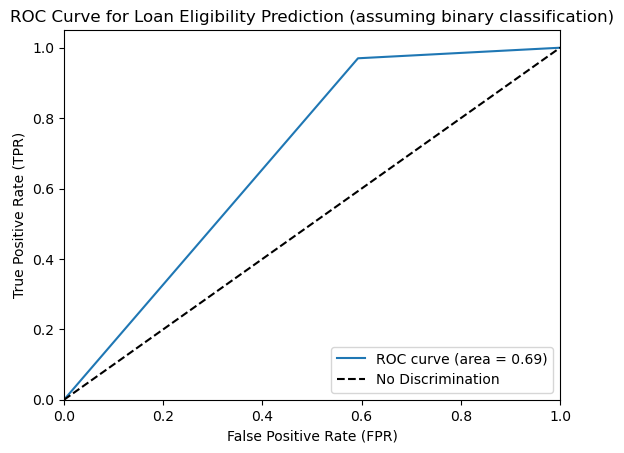

In [63]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Discrimination')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Loan Eligibility Prediction (assuming binary classification)')
plt.legend(loc="lower right")
plt.show()

In [69]:

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'ApplicantIncomeLog', 'LoanAmountLog', 'Loan_Amount_TermLog', 'TotalIncomeLog']

data = {}

for col in cols:
    data[col] = input(f"Enter value for {col}: ")

df = pd.DataFrame(data, index=[0])

prediction = model.predict(df)
prediction


Enter value for Gender:  1
Enter value for Married:  1
Enter value for Dependents:  1
Enter value for Education:  1
Enter value for Self_Employed:  1
Enter value for Credit_History:  1.0
Enter value for Property_Area:  1
Enter value for ApplicantIncomeLog:  1
Enter value for LoanAmountLog:  1
Enter value for Loan_Amount_TermLog:  1
Enter value for TotalIncomeLog:  1


array([0], dtype=int64)